# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [74]:
import yfinance as yf

import plotly.express as px
from plotly import graph_objects

import pandas as pd
import numpy as np

In [76]:
ticker = ['MGLU3.SA','AMER3.SA', 'BHIA3.SA']
data_inicio = '2023-07-01'

# Baixa os dados e os armazena em um DataFrame
df_valores = yf.download(ticker, start=data_inicio)
df_valores.head()

C:\Users\User\AppData\Local\Temp\ipykernel_4624\3041659173.py:6: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  3 of 3 completed


Price         Close                           High                        \
Ticker     AMER3.SA   BHIA3.SA   MGLU3.SA AMER3.SA   BHIA3.SA   MGLU3.SA   
Date                                                                       
2023-07-03    119.0  47.683376  32.175121    119.0  48.558300  32.549252   
2023-07-04    116.0  47.464645  31.520395    118.0  48.120838  32.081589   
2023-07-05    117.0  48.558300  31.894526    118.0  49.214493  32.829849   
2023-07-06    114.0  45.277332  29.462685    117.0  48.339569  31.613928   
2023-07-07    116.0  46.370991  29.743282    118.0  47.027184  30.865669   

Price           Low                           Open                        \
Ticker     AMER3.SA   BHIA3.SA   MGLU3.SA AMER3.SA   BHIA3.SA   MGLU3.SA   
Date                                                                       
2023-07-03    115.0  47.027184  31.426865    118.0  47.683376  31.894526   
2023-07-04    116.0  46.589722  31.333330    117.0  47.464645  32.081589   
2023-07-05    115.0  46.808453  31.239799    116.0  47.027184  31.333330   
2023-07-06    113.0  44.839870  29.369152    117.0  48.339569  31.520395   
2023-07-07    113.0  45.496063  29.462685    115.0  45.714794  30.023878   

Price        Volume                     
Ticker     AMER3.SA BHIA3.SA  MGLU3.SA  
Date                                    
2023-07-03   110722  2272525   7776091  
2023-07-04    59942  2375300   7033514  
2023-07-05    81015  2656083  17721818  
2023-07-06   125021  4231063  18417609  
2023-07-07   141436  2606405  11916392

In [77]:
df_valores.to_csv('valores_varejo.csv', index=False)

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [81]:
df_valores = df_valores.stack()
df_valores

Price                     Close        High         Low        Open    Volume
Date       Ticker                                                            
2023-07-03 AMER3.SA  119.000000  119.000000  115.000000  118.000000    110722
           BHIA3.SA   47.683376   48.558300   47.027184   47.683376   2272525
           MGLU3.SA   32.175121   32.549252   31.426865   31.894526   7776091
2023-07-04 AMER3.SA  116.000000  118.000000  116.000000  117.000000     59942
           BHIA3.SA   47.464645   48.120838   46.589722   47.464645   2375300
...                         ...         ...         ...         ...       ...
2025-07-11 BHIA3.SA    3.000000    3.030000    2.950000    2.980000   2051500
           MGLU3.SA    8.040000    8.240000    7.920000    8.240000  23898400
2025-07-14 AMER3.SA    5.330000    5.330000    5.160000    5.160000    126700
           BHIA3.SA    2.990000    3.050000    2.970000    3.010000    207900
           MGLU3.SA    8.000000    8.010000    7.940000    8.010000   1371800

[1521 rows x 5 columns]

In [83]:
df_valores['Amplitude'] = df_valores['High'] - df_valores['Low']
df_valores = df_valores.unstack()
df_valores['Amplitude']

Ticker,AMER3.SA,BHIA3.SA,MGLU3.SA
Date,,,
2023-07-03,4.00,1.531116,1.122387
2023-07-04,2.00,1.531116,0.748259
2023-07-05,3.00,2.406040,1.590050
2023-07-06,4.00,3.499699,2.244776
2023-07-07,5.00,1.531120,1.402985
...,...,...,...
2025-07-08,0.09,0.520000,0.450000
2025-07-09,0.24,0.220000,0.520000
2025-07-10,0.21,0.160000,0.280000


In [85]:
df_valores

Price         Close                           High                        \
Ticker     AMER3.SA   BHIA3.SA   MGLU3.SA AMER3.SA   BHIA3.SA   MGLU3.SA   
Date                                                                       
2023-07-03   119.00  47.683376  32.175121   119.00  48.558300  32.549252   
2023-07-04   116.00  47.464645  31.520395   118.00  48.120838  32.081589   
2023-07-05   117.00  48.558300  31.894526   118.00  49.214493  32.829849   
2023-07-06   114.00  45.277332  29.462685   117.00  48.339569  31.613928   
2023-07-07   116.00  46.370991  29.743282   118.00  47.027184  30.865669   
...             ...        ...        ...      ...        ...        ...   
2025-07-08     5.32   3.100000   8.900000     5.40   3.620000   9.260000   
2025-07-09     5.17   3.030000   8.550000     5.36   3.220000   9.000000   
2025-07-10     5.19   3.010000   8.340000     5.20   3.060000   8.410000   
2025-07-11     5.16   3.000000   8.040000     5.22   3.030000   8.240000   
2025-07-14     5.33   2.990000   8.000000     5.33   3.050000   8.010000   

Price           Low                           Open                        \
Ticker     AMER3.SA   BHIA3.SA   MGLU3.SA AMER3.SA   BHIA3.SA   MGLU3.SA   
Date                                                                       
2023-07-03   115.00  47.027184  31.426865   118.00  47.683376  31.894526   
2023-07-04   116.00  46.589722  31.333330   117.00  47.464645  32.081589   
2023-07-05   115.00  46.808453  31.239799   116.00  47.027184  31.333330   
2023-07-06   113.00  44.839870  29.369152   117.00  48.339569  31.520395   
2023-07-07   113.00  45.496063  29.462685   115.00  45.714794  30.023878   
...             ...        ...        ...      ...        ...        ...   
2025-07-08     5.31   3.100000   8.810000     5.37   3.570000   9.170000   
2025-07-09     5.12   3.000000   8.480000     5.34   3.130000   9.000000   
2025-07-10     4.99   2.900000   8.130000     5.10   2.980000   8.240000   
2025-07-11     5.10   2.950000   7.920000     5.17   2.980000   8.240000   
2025-07-14     5.16   2.970000   7.940000     5.16   3.010000   8.010000   

Price        Volume                     Amplitude                      
Ticker     AMER3.SA  BHIA3.SA  MGLU3.SA  AMER3.SA  BHIA3.SA  MGLU3.SA  
Date                                                                   
2023-07-03   110722   2272525   7776091      4.00  1.531116  1.122387  
2023-07-04    59942   2375300   7033514      2.00  1.531116  0.748259  
2023-07-05    81015   2656083  17721818      3.00  2.406040  1.590050  
2023-07-06   125021   4231063  18417609      4.00  3.499699  2.244776  
2023-07-07   141436   2606405  11916392      5.00  1.531120  1.402985  
...             ...       ...       ...       ...       ...       ...  
2025-07-08  1078800  10897700  21585100      0.09  0.520000  0.450000  
2025-07-09  1659800   4531700  19145400      0.24  0.220000  0.520000  
2025-07-10  1630600   3074000  26382600      0.21  0.160000  0.280000  
2025-07-11   936500   2051500  23898400      0.12  0.080000  0.320000  
2025-07-14   126700    207900   1371800      0.17  0.080000  0.070000  

[507 rows x 18 columns]

In [93]:
df_amplitude = df_valores['Amplitude'].stack().reset_index()
df_amplitude.columns = ['data', 'ativo', 'valor']
df_amplitude

,data,ativo,valor
0,2023-07-03,AMER3.SA,4.000000
1,2023-07-03,BHIA3.SA,1.531116
2,2023-07-03,MGLU3.SA,1.122387
3,2023-07-04,AMER3.SA,2.000000
4,2023-07-04,BHIA3.SA,1.531116
...,...,...,...
1516,2025-07-11,BHIA3.SA,0.080000
1517,2025-07-11,MGLU3.SA,0.320000
1518,2025-07-14,AMER3.SA,0.170000
1519,2025-07-14,BHIA3.SA,0.080000


C:\Users\User\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



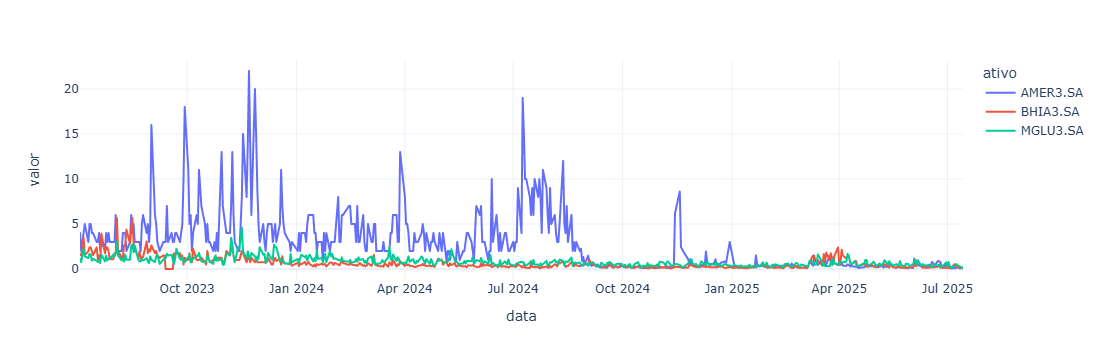

In [99]:
fig = px.line(data_frame=df_amplitude, 
              x='data', 
              y='valor', 
              color='ativo', 
              template='plotly_white')
fig.show()

Pode-se observar que existe maior volatilidade de mercado no ativo`Americanas` em comparação com os outros dois ativos de setembro de 2023 
até setembro de 2024. A partir desse período percebemos um nivelamento no valor de mercado das três empresas, com poucas variações notáveis.